In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# NORMAL EQUATION

## $$ \hat\theta =  (X^TX)^{-1}X^Ty $$


In [4]:
m = 200
rng = np.random.default_rng(seed=42)

X = 2 * rng.random((m,1))
y = 4 + 3*X + rng.standard_normal((m,1))

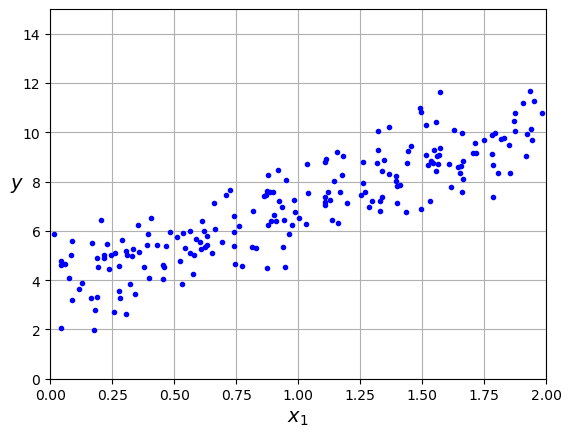

In [ ]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()

In [6]:
from sklearn.preprocessing import add_dummy_feature

X_b =  add_dummy_feature(X)

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[3.69084138],
       [3.32960458]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

array([[ 3.69084138],
       [10.35005055]])

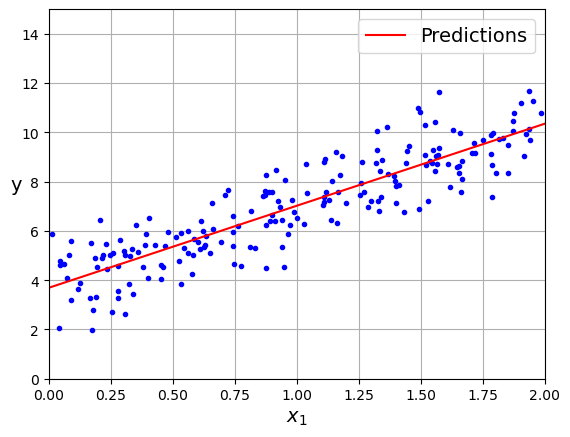

In [8]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, 'r', label='Predictions')

plt.xlabel('$x_1$')
plt.ylabel('y', rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend()
plt.show()

# Scikit-Learn

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg =  LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_


(array([3.69084138]), array([[3.32960458]]))

In [10]:
lin_reg.predict(X_new)

array([[ 3.69084138],
       [10.35005055]])

# Batch Gradient Descent

In [11]:
eta = 0.1
n_epochs =  1000

In [12]:
rng = np.random.default_rng(seed=42)

In [13]:
theta =  rng.standard_normal((2,1))
theta

array([[ 0.30471708],
       [-1.03998411]])

In [14]:
J_log = np.zeros(n_epochs)

for i in range(n_epochs):
    J_log[i] = (1/m)*((X_b@theta - y)**2).sum()
    gradients =  2/m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta*gradients

theta

array([[3.69084138],
       [3.32960458]])

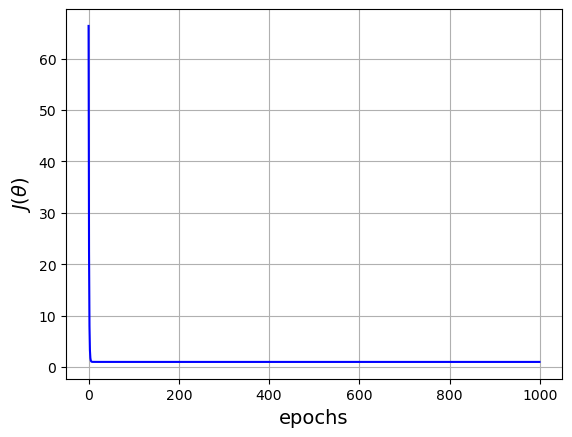

In [15]:
plt.plot(np.arange(n_epochs), J_log, 'b-')
plt.xlabel('epochs')
plt.ylabel(r'$J(\theta)$')
plt.grid()
plt.show()

# Polynomial Regression

In [30]:
rng = np.random.default_rng(seed=42)

In [31]:
m =  200

X = 6 * rng.random((m,1)) - 3
y = 0.5*X**2 + X + 2 + rng.standard_normal((m,1))

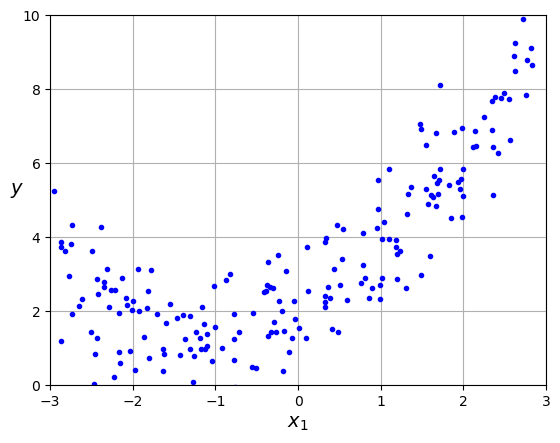

In [32]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly_features =  PolynomialFeatures( degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

In [34]:
X_poly

array([[ 1.64373629e+00,  2.70186900e+00],
       [-3.66729361e-01,  1.34490425e-01],
       [ 2.15158752e+00,  4.62932885e+00],
       [ 1.18420817e+00,  1.40234900e+00],
       [-2.43493591e+00,  5.92891290e+00],
       [ 2.85373411e+00,  8.14379837e+00],
       [ 1.56683821e+00,  2.45498198e+00],
       [ 1.71638583e+00,  2.94598032e+00],
       [-2.23131820e+00,  4.97878093e+00],
       [-2.97684373e-01,  8.86159857e-02],
       [-7.75211855e-01,  6.00953420e-01],
       [ 2.56058993e+00,  6.55662081e+00],
       [ 8.63190720e-01,  7.45098220e-01],
       [ 1.93656968e+00,  3.75030212e+00],
       [-3.39514807e-01,  1.15270304e-01],
       [-1.63656767e+00,  2.67835374e+00],
       [ 3.27508722e-01,  1.07261963e-01],
       [-2.61709646e+00,  6.84919390e+00],
       [ 1.96578703e+00,  3.86431866e+00],
       [ 7.89986395e-01,  6.24078504e-01],
       [ 1.54852644e+00,  2.39793414e+00],
       [-8.72844191e-01,  7.61856982e-01],
       [ 2.82418815e+00,  7.97603869e+00],
       [ 2.

In [35]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00540719]), array([[1.11022126, 0.50526985]]))

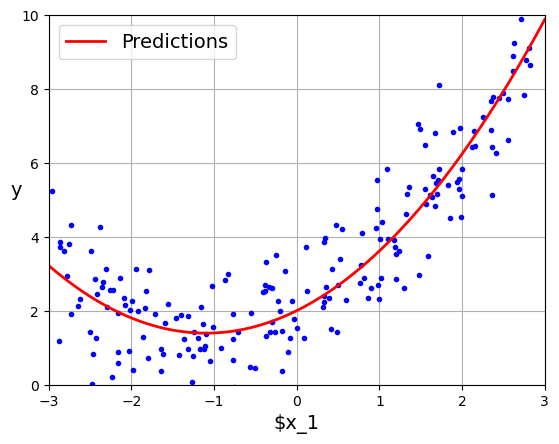

In [37]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)

y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new,'r-', linewidth=2, label='Predictions')

plt.xlabel('$x_1')
plt.ylabel('y', rotation=0)
plt.legend(loc='upper left')
plt.axis([-3,3,0,10])
plt.grid()
plt.show()